- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.preprocessing import normalize
from memory_profiler import memory_usage

import pandas as pd
import numpy as np

from ML_loader import DatasetLoader,ModelLoader


In [2]:
#Get data 
loader = DatasetLoader()
loader.read_dataset('partial_database.csv',class_path='labelsDefault.txt',separator=',')
loader.split_dataset()

#Normalize data, if not already normalized
print(np.shape(loader.X_train),np.shape(loader.X_test),np.shape(loader.y_train),np.shape(loader.y_test))

(4048, 17) (1012, 17) (4048,) (1012,)


In [3]:
#Get model
model = ModelLoader()
model.set_model(BernoulliNB())

cv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)

#Optimization 
param = {'alpha': np.linspace(0.5, 1.5, 100),
              'binarize': np.linspace(0, 2, 40),
              'fit_prior': [True, False]}

model.set_optimal_params(param)

model.optimize(loader.X_train,loader.y_train,cv=cv,scoring='homogeneity_score',n_iter=10)

#Train model with optimal params
model.set_model(BernoulliNB(**model.optimal_params))

Partial fit
Score accuracy group 0:  0.8136645962732919
Score accuracy group learned 0:  0.8136645962732919
Score accuracy global:  0.2628458498023715
Memory:  157.66796875 MB
Partial fit
Score accuracy group 1:  0.8260869565217391
Score accuracy group learned 0:  0.7919254658385093
Score accuracy group learned 1:  0.8260869565217391
Score accuracy global:  0.3359683794466403
Memory:  184.0625 MB
Partial fit
Score accuracy group 2:  0.5
Score accuracy group learned 0:  0.6956521739130435
Score accuracy group learned 1:  0.8260869565217391
Score accuracy group learned 2:  0.5
Score accuracy global:  0.40019762845849804
Memory:  190.3671875 MB
Partial fit
Score accuracy group 3:  0.41304347826086957
Score accuracy group learned 0:  0.6739130434782609
Score accuracy group learned 1:  0.8043478260869565
Score accuracy group learned 2:  0.42391304347826086
Score accuracy group learned 3:  0.41304347826086957
Score accuracy global:  0.4308300395256917
Memory:  196.3828125 MB
Partial fit
Scor

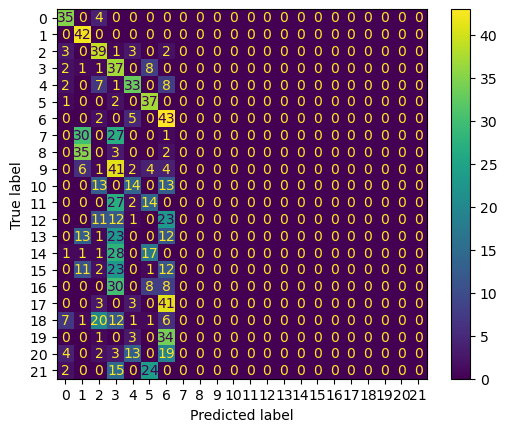

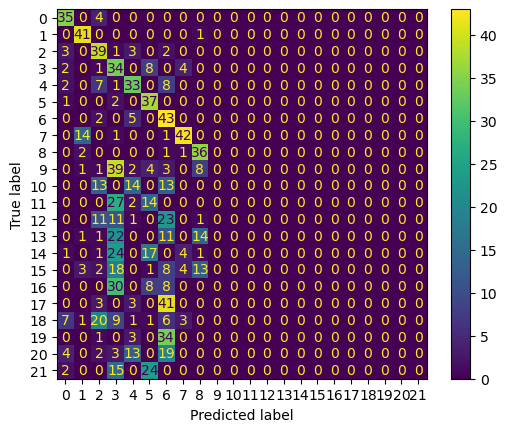

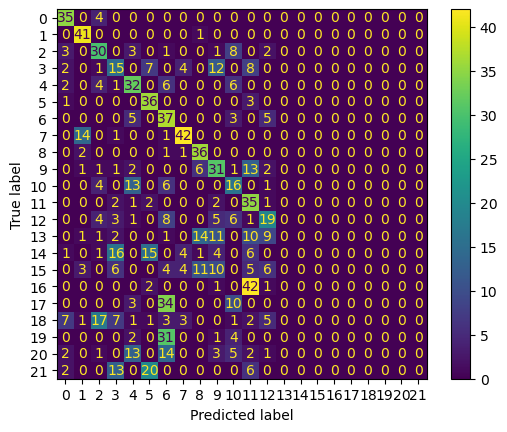

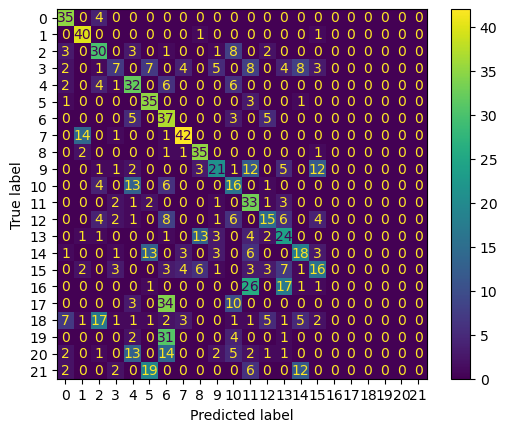

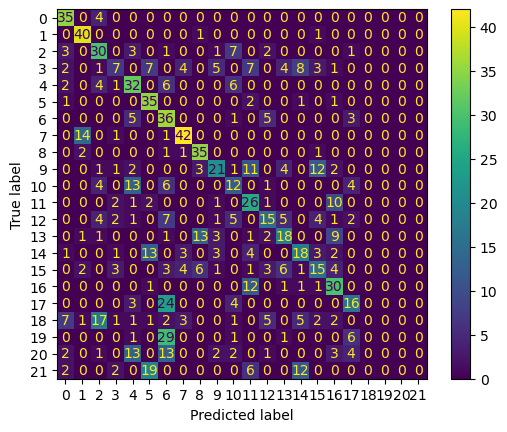

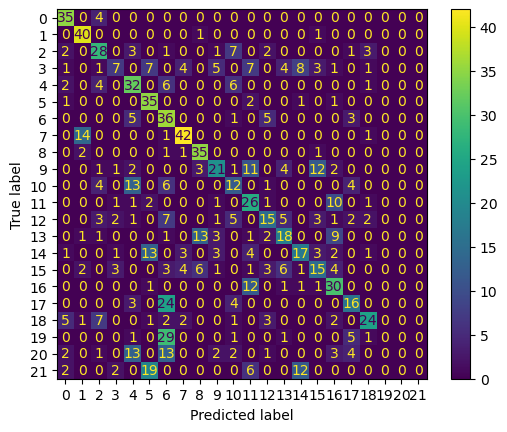

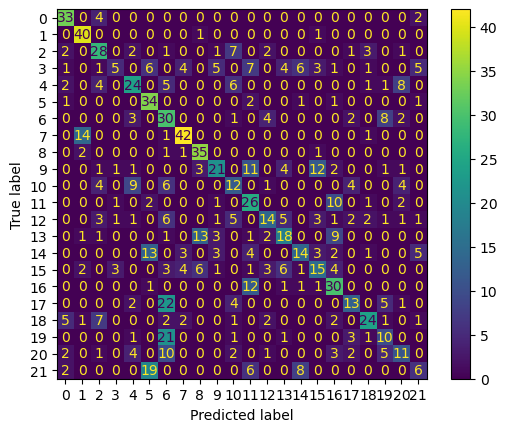

In [4]:
##Split by class, to increment by class:
class_to_group = {1:[1,2,3,4,5,6,7],2:[8,9],3:[10,11,12,13],4:[14,15,16],5:[17,18],6:[19],7:[20,21,22]}
X_train_merged, X_test_merged, y_train_merged, y_test_merged=loader.split_dataset_class(class_to_group,random_state=1)
memory_values = []

#Train model
for idx,(X_train,y_train,X_test,y_test) in enumerate(zip(X_train_merged,y_train_merged,X_test_merged,y_test_merged)):
    mem,res=model.partial_fit_train(X_train,y_train,classes=loader.classes)
    print(f"Score accuracy group {idx}: ",model.score(X_test,y_test))
    for i in range(idx+1):
        print(f"Score accuracy group learned {i}: ",model.score(X_test_merged[i],y_test_merged[i]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))
    
    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")

Partial fit
Score accuracy batch:  0.45652173913043476
Score accuracy global:  0.48616600790513836
Memory:  241.90625 MB
Partial fit
Score accuracy batch:  0.47035573122529645
Score accuracy global:  0.4841897233201581
Memory:  230.2890625 MB
Partial fit
Score accuracy batch:  0.4525691699604743
Score accuracy global:  0.4851778656126482
Memory:  231.73046875 MB
Partial fit
Score accuracy batch:  0.466403162055336
Score accuracy global:  0.4851778656126482
Memory:  233.09375 MB
Partial fit
Score accuracy batch:  0.48616600790513836
Score accuracy global:  0.4891304347826087
Memory:  234.3359375 MB
Partial fit
Score accuracy batch:  0.48221343873517786
Score accuracy global:  0.4881422924901186
Memory:  236.2421875 MB
Partial fit
Score accuracy batch:  0.44861660079051385
Score accuracy global:  0.4891304347826087
Memory:  236.77734375 MB
Partial fit
Score accuracy batch:  0.4624505928853755
Score accuracy global:  0.4881422924901186
Memory:  237.40625 MB
Partial fit
Score accuracy batc

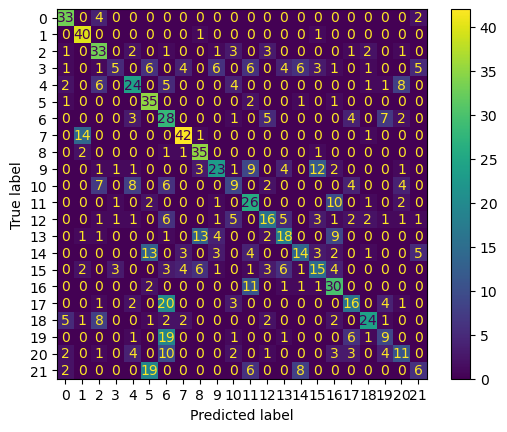

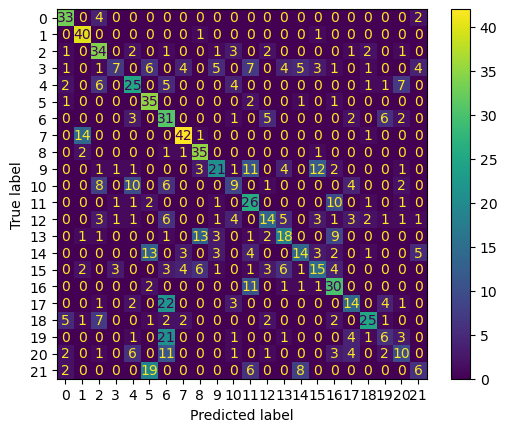

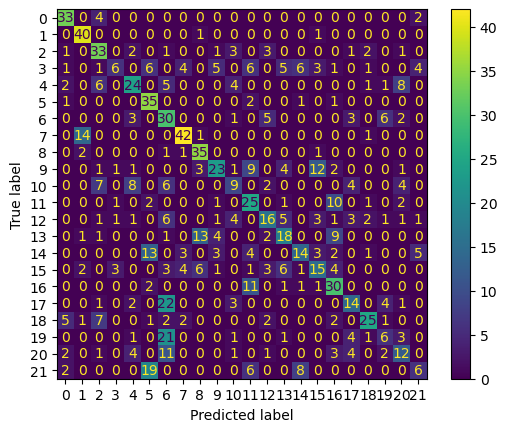

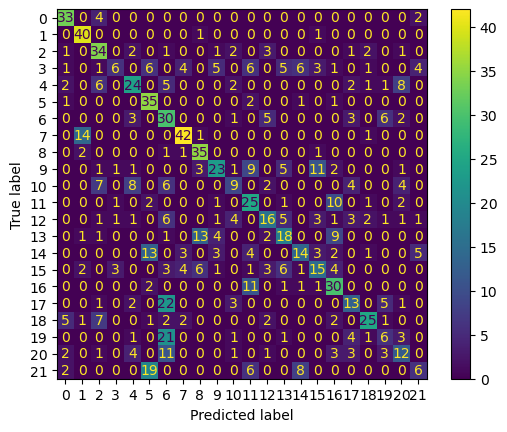

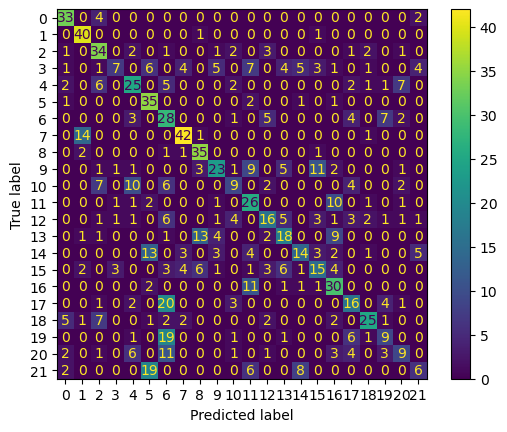

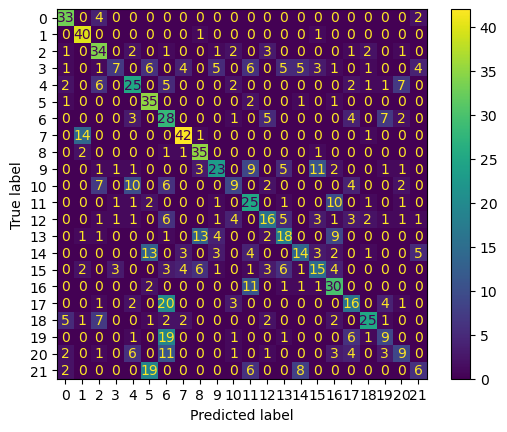

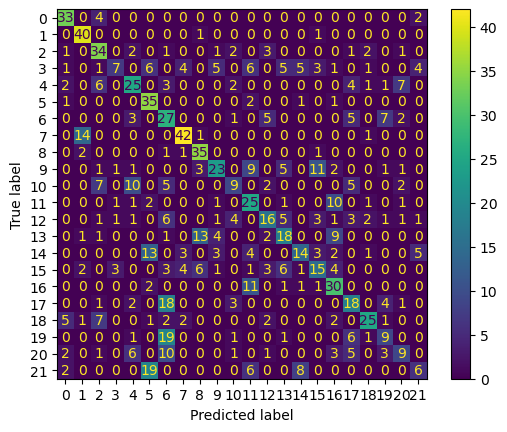

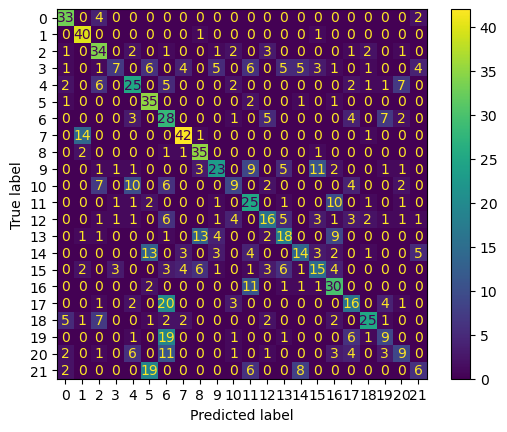

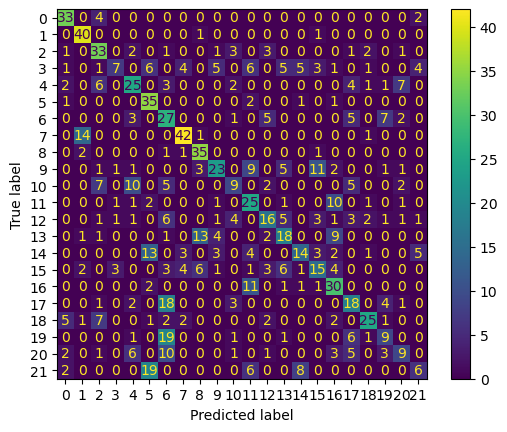

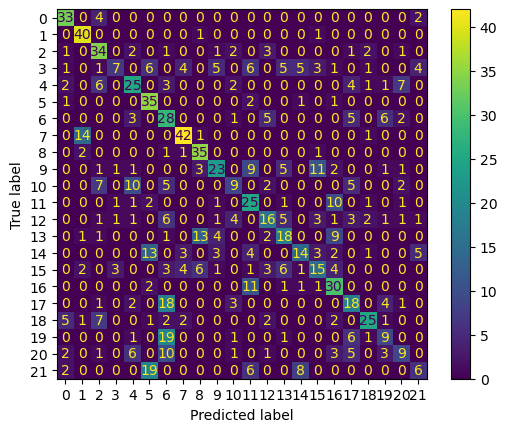

In [5]:
X_train_split_data,y_train_split_data,X_test_split_data,y_test_split_data=loader.split_dataset_data(10)
memory_values = []

for x in range(len(X_train_split_data)):
    mem,res=model.partial_fit_train(X_train_split_data[x],y_train_split_data[x],classes=loader.classes)
    print("Score accuracy batch: ",model.score(X_test_split_data[x],y_test_split_data[x]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))

    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")